<a href="https://colab.research.google.com/github/khanh2k1/CTDL-thi-trac-nghiem/blob/master/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Tạo DataFrame từ tập dữ liệu
data = pd.read_csv(
    'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/Dataset/ecommerceDataset.csv',
    names = ['category', 'product']
)

In [22]:
df = pd.DataFrame(data)

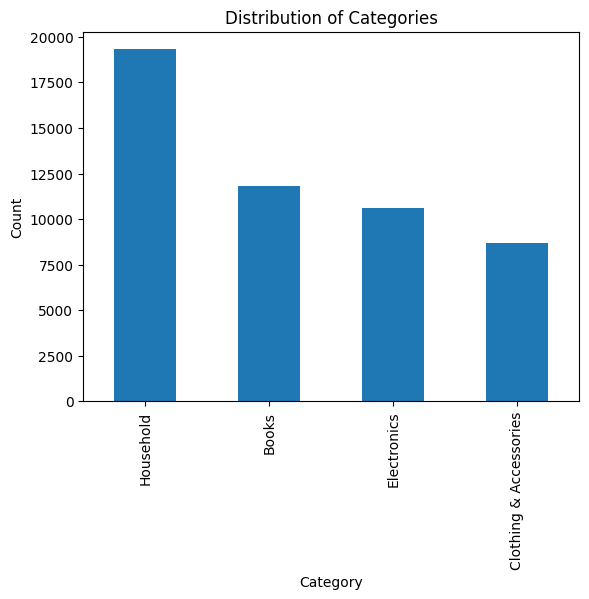

In [24]:

# Vẽ biểu đồ cột
category_counts = df['category'].value_counts()
category_counts.plot(kind='bar', title='Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


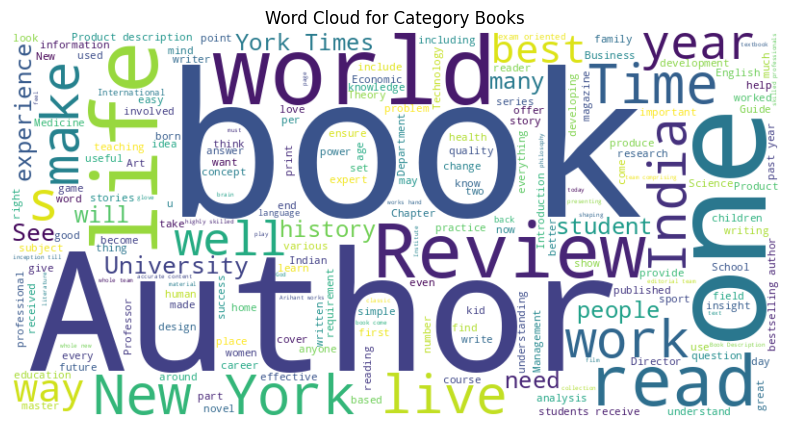

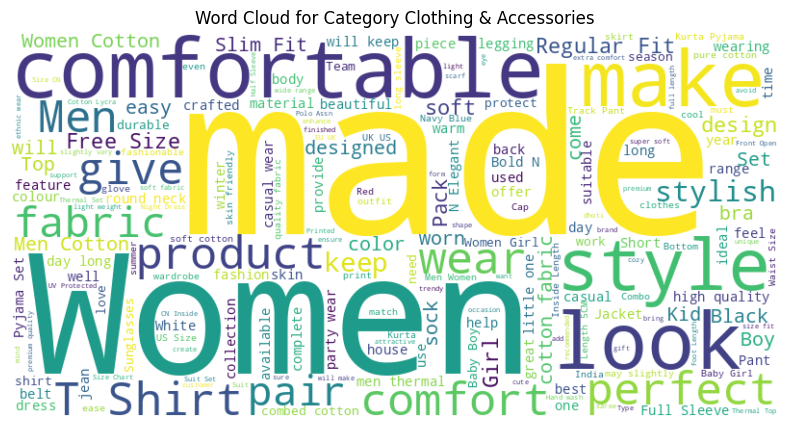

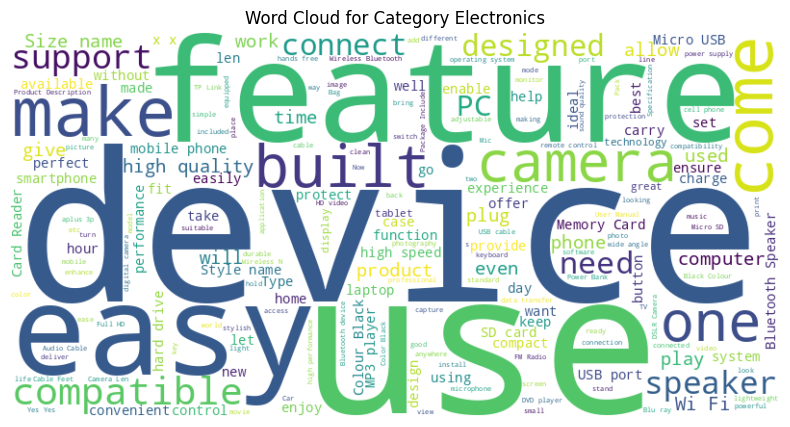

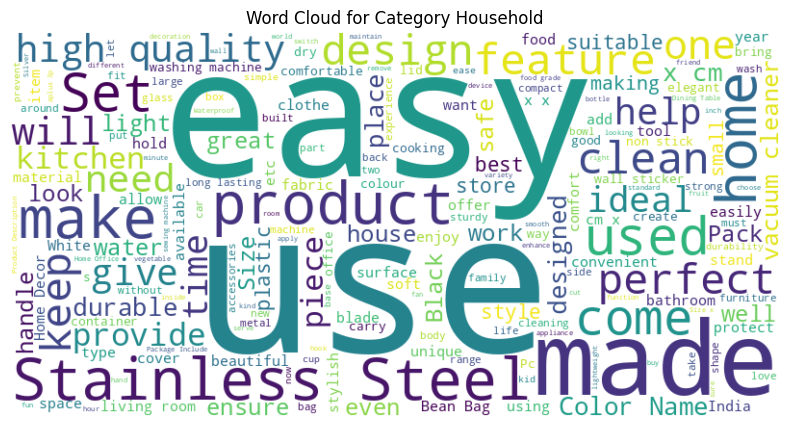

In [29]:
from wordcloud import WordCloud


# Tạo Word Cloud cho từng loại
for category, group in df.groupby('category'):
    word_list = [str(word) for word in group['product'].tolist() if isinstance(word, str)]  # Loại bỏ giá trị không hợp lệ

    # Tạo chuỗi dữ liệu từ danh sách
    word_text = ' '.join(word_list)

    # Tạo Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(word_text)

    # Vẽ biểu đồ Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category {category}')
    plt.axis('off')
    plt.show()




In [45]:
from nltk import FreqDist, bigrams
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

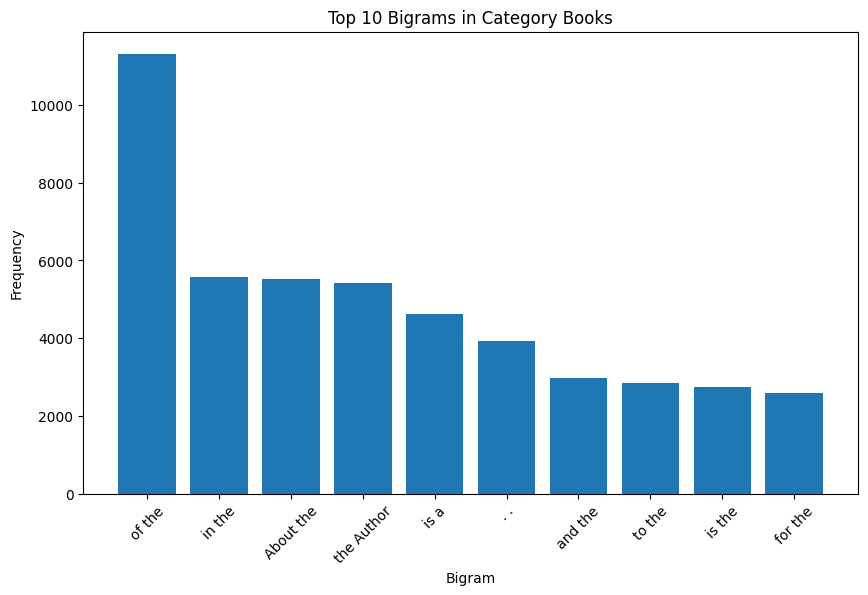

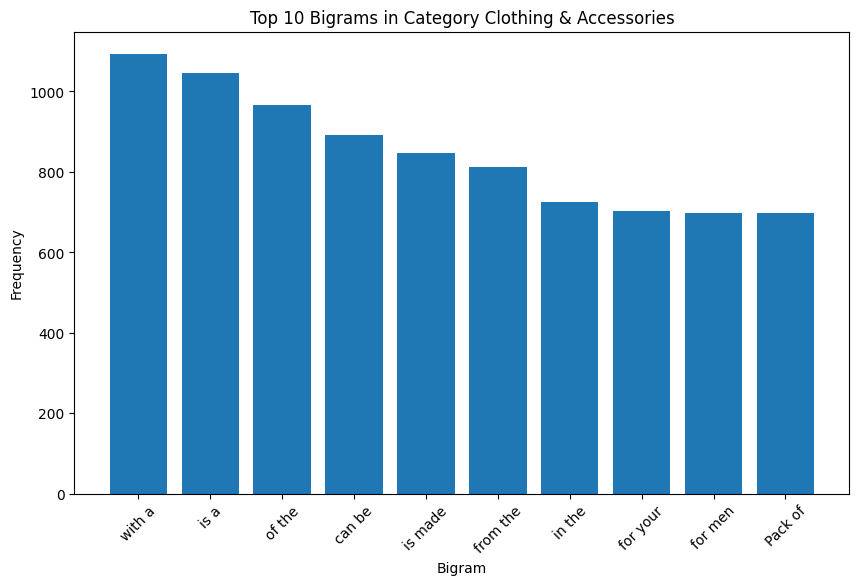

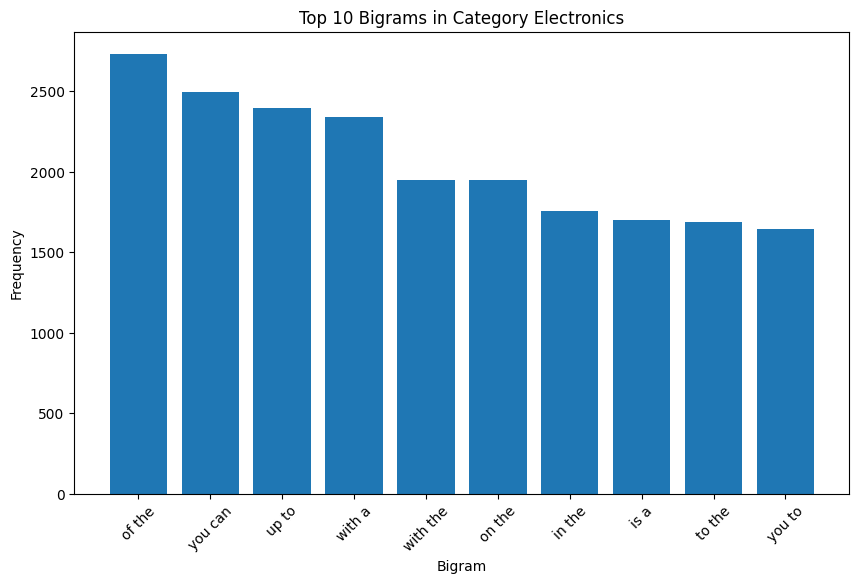

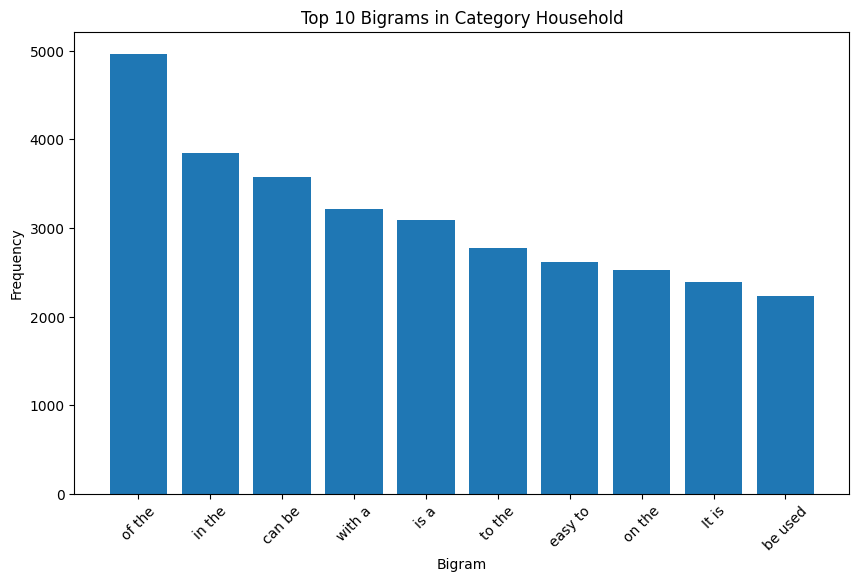

In [50]:
# Tạo danh sách cặp từ xuất hiện trong từng loại
for category, group in df.groupby('category'):
    word_list = [pair.split() for pair in group['product'] if isinstance(pair, str)]  # Loại bỏ các giá trị không phải là chuỗi

    words = [word for pair in word_list for word in pair]  # Tạo danh sách từ từ danh sách các cặp từ

    # Tiến hành tokenize
    bigram_freq = FreqDist(bigrams(words))

    # Lấy top 10 cặp từ xuất hiện nhiều nhất
    top_bigrams = bigram_freq.most_common(10)

    # Tạo danh sách riêng cho trục x và trục y
    x = [' '.join(bigram) for bigram, freq in top_bigrams]
    y = [freq for bigram, freq in top_bigrams]

    # Tạo biểu đồ cột cho top 10 cặp từ
    plt.figure(figsize=(10, 6))
    plt.bar(x, y)
    plt.xlabel('Bigram')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Bigrams in Category {category}')
    plt.xticks(rotation=45)
    plt.show()
